# Zack Supple

## In this tutorial I am going to run you through how to make an effective decision tree.

### Decision Trees are a useful tool in the business world today because they can used to help classify different areas and can be used to predict what a customer may buy as an example.

In [1]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [3]:
#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

/Users/zacksupple/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
# import data
df = pd.read_csv("data/iris.csv")
print df.head()

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


#### I used the Iris data set because it is a clean data set that wouldn't need much cleaning.

In [6]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
# check for missing data
df.groupby('Name').size()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
# replace values
df = df.replace({'Name': 'Iris-setosa'}, {'Name': '0'})
df = df.replace({'Name': 'Iris-versicolor'}, {'Name': '1'})
df = df.replace({'Name': 'Iris-virginica'}, {'Name': '2'})

In [9]:
# check name column for amount of data
df['Name'].describe()

count     150
unique      3
top         2
freq       50
Name: Name, dtype: object

In [10]:
# change name column data type
df['Name'] = df['Name'].astype(float)
print df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name           float64
dtype: object


In [11]:
# make X and Y values
y = df['Name']

X = df.drop(['Name'], axis = 1)

In [12]:
# check X variables
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# create the test and train data sets for the decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [14]:
# decision tree descriptors
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
# check accuracy of the decision tree
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.955555555556
[[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]


#### This accuracy score shows that 95.56% of the time the decision tree correctly predicted what the random iris was. The Matrix that is shown shows if the Iris was setosa and predicted a setosa in the fist column and first row. For versicolor the corretly predicted flowers are in the second row and second column. And finally correctly predicted virginica are in coulumn 3 and row 3. The numbers in the other rows in columns are incorrectly predicted.

In [16]:
# Viusualize decision tree
tree.export_graphviz(dt, out_file='data/decisiontree1.dot', feature_names=X.columns)

In [17]:
# show decision tree in the notebook
from IPython.display import Image
Image("data/decisiontree1.png")

In [18]:
# change how many random flowers are chosen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=75)

In [19]:
# decision tree descriptors
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [20]:
# check data accuracy
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.955555555556
[[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]


#### After changing the random state it doesn't change the outcome of the accuracy of the decision tree. Changing the random state doesn't change anything for the decision tree.

In [21]:
# Viusualize decision tree
tree.export_graphviz(dt, out_file='data/decisiontree.dot', feature_names=X.columns)

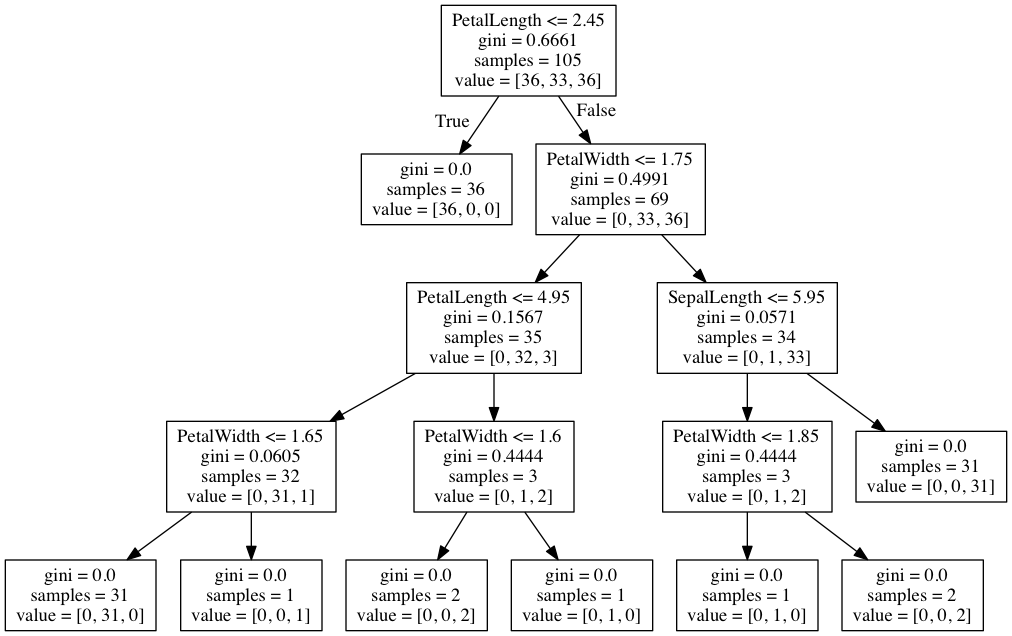

In [22]:
# show decision tree in the notebook
from IPython.display import Image
Image("data/decisiontree.png")

In [23]:
# decrease test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [24]:
# show decision tree descriptors
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [25]:
# show decision tree accuracy
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.947368421053
[[11  0  0]
 [ 0 14  1]
 [ 0  1 11]]


#### After decreasing the test size, the accuracy of the decision tree decreased. This happens because less inputs are used on training the machine learning algorithm so it wont be as accurate. As we can see with the 94.74% accuracy of this decision tree model.

In [26]:
# Viusualize decision tree
tree.export_graphviz(dt, out_file='data/decisiontree2.dot', feature_names=X.columns)

In [27]:
# show decision tree in the notebook
from IPython.display import Image
Image("data/decisiontree2.png")

In [28]:
# increase test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)

In [29]:
# decision tree descriptors
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [30]:
# accuracy of decision tree
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.962264150943
[[19  0  0]
 [ 0 17  1]
 [ 0  1 15]]


#### After increasing the test size the decisoin tree became more accurate with a 96.23%.

In [31]:
# Viusualize decision tree
tree.export_graphviz(dt, out_file='data/decisiontree3.dot', feature_names=X.columns)

In [32]:
# show decision tree in the notebook
from IPython.display import Image
Image("data/decisiontree3.png")

In [33]:
# increase test size more
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=50)

In [34]:
# DT descriptors
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [35]:
# accuracy of decision tree
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.966666666667
[[21  0  0]
 [ 0 20  1]
 [ 0  1 17]]


#### Increasing the test size one final time to see if there is a significant accuracy increase and there wasnt a drastic in crease to 96.67% accuracy.

In [36]:
# Viusualize decision tree
tree.export_graphviz(dt, out_file='data/decisiontree3.dot', feature_names=X.columns)

In [37]:
# show decision tree in the notebook
from IPython.display import Image
Image("data/decisiontree4.png")

### There are multiple ways to test the accuracy of a decision tree and one that is used often in Precision Recall score. The precision part of the test determines relevant values and the recall test shows how many true relevant results are returned. Precision is represented as the number of true positives divided by the number of true positives plus the number of false positives. The recall is represented as the number of true positives divided by the number of true positives plus the number of false negatives.

In [38]:
# import precision recall score packages
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [39]:
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [40]:
# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

In [41]:
# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [42]:
# check precision score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.72


#### Having a 72% percision recall score isn't bad because we dont know how many relevant values are within our data set.

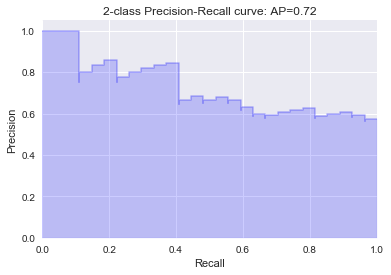

In [43]:
# show precision graph
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

#### You can also show graphical representation of precision recall. This helps show the relationship between the precision of the test and the recall of the test. As we can see the less recall we have the higher precision and vice versa.

In [44]:
# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

In [45]:
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

In [46]:
# use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

In [47]:
# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

In [48]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])


In [49]:
# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.45


#### The micro average over all classes is when presicion recall is used to classify each class that you designate above and averages all the scores together.

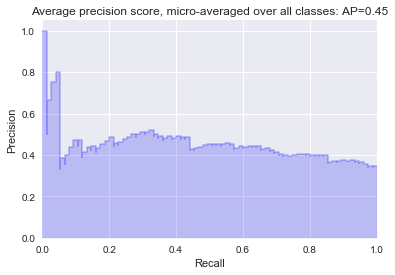

In [50]:
# show average precision score graph
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

#### Like above you can represent the micro average of all the precision recall curves into one graph. The graph shows that we dotn have that good of precison when recall gets near 10% recall.

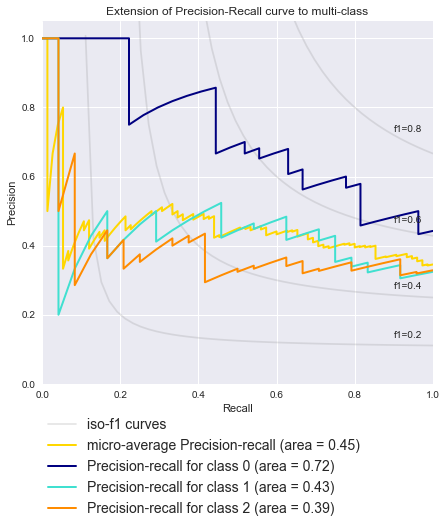

In [53]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

    
# Display Precisoin Recall Curves for all classes 
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

#### Finally we can take all the curves and put them into one graph all together. This gives you the precision recall curve for each class, the micro average precision recall curve and the iso-f1 curves.

## The sources I used for this tutorial were our decision tree jupyter notebook and 
## @article{scikit-learn, title={Scikit-learn: Machine Learning in {P}ython}, author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P. and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.}, journal={Journal of Machine Learning Research}, volume={12}, pages={2825--2830}, year={2011}}

# On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.